<a href="https://colab.research.google.com/github/VenkataJanga/AQI_Project/blob/master/DecisionTreeRegressor_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor as tree
import os

In [6]:
os.getcwd()

'/content'

In [8]:
aqi_data = pd.read_csv("/content/Real_Combine.csv")
aqi_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [10]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
T         731 non-null float64
TM        731 non-null float64
Tm        731 non-null float64
SLP       731 non-null float64
H         731 non-null float64
VV        731 non-null float64
V         731 non-null float64
VM        731 non-null float64
PM 2.5    611 non-null float64
dtypes: float64(9)
memory usage: 51.5 KB


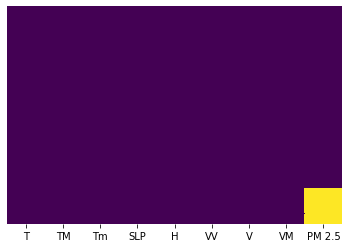

In [11]:

sns.heatmap(aqi_data.isnull(),yticklabels=False, cbar=False,cmap='viridis')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


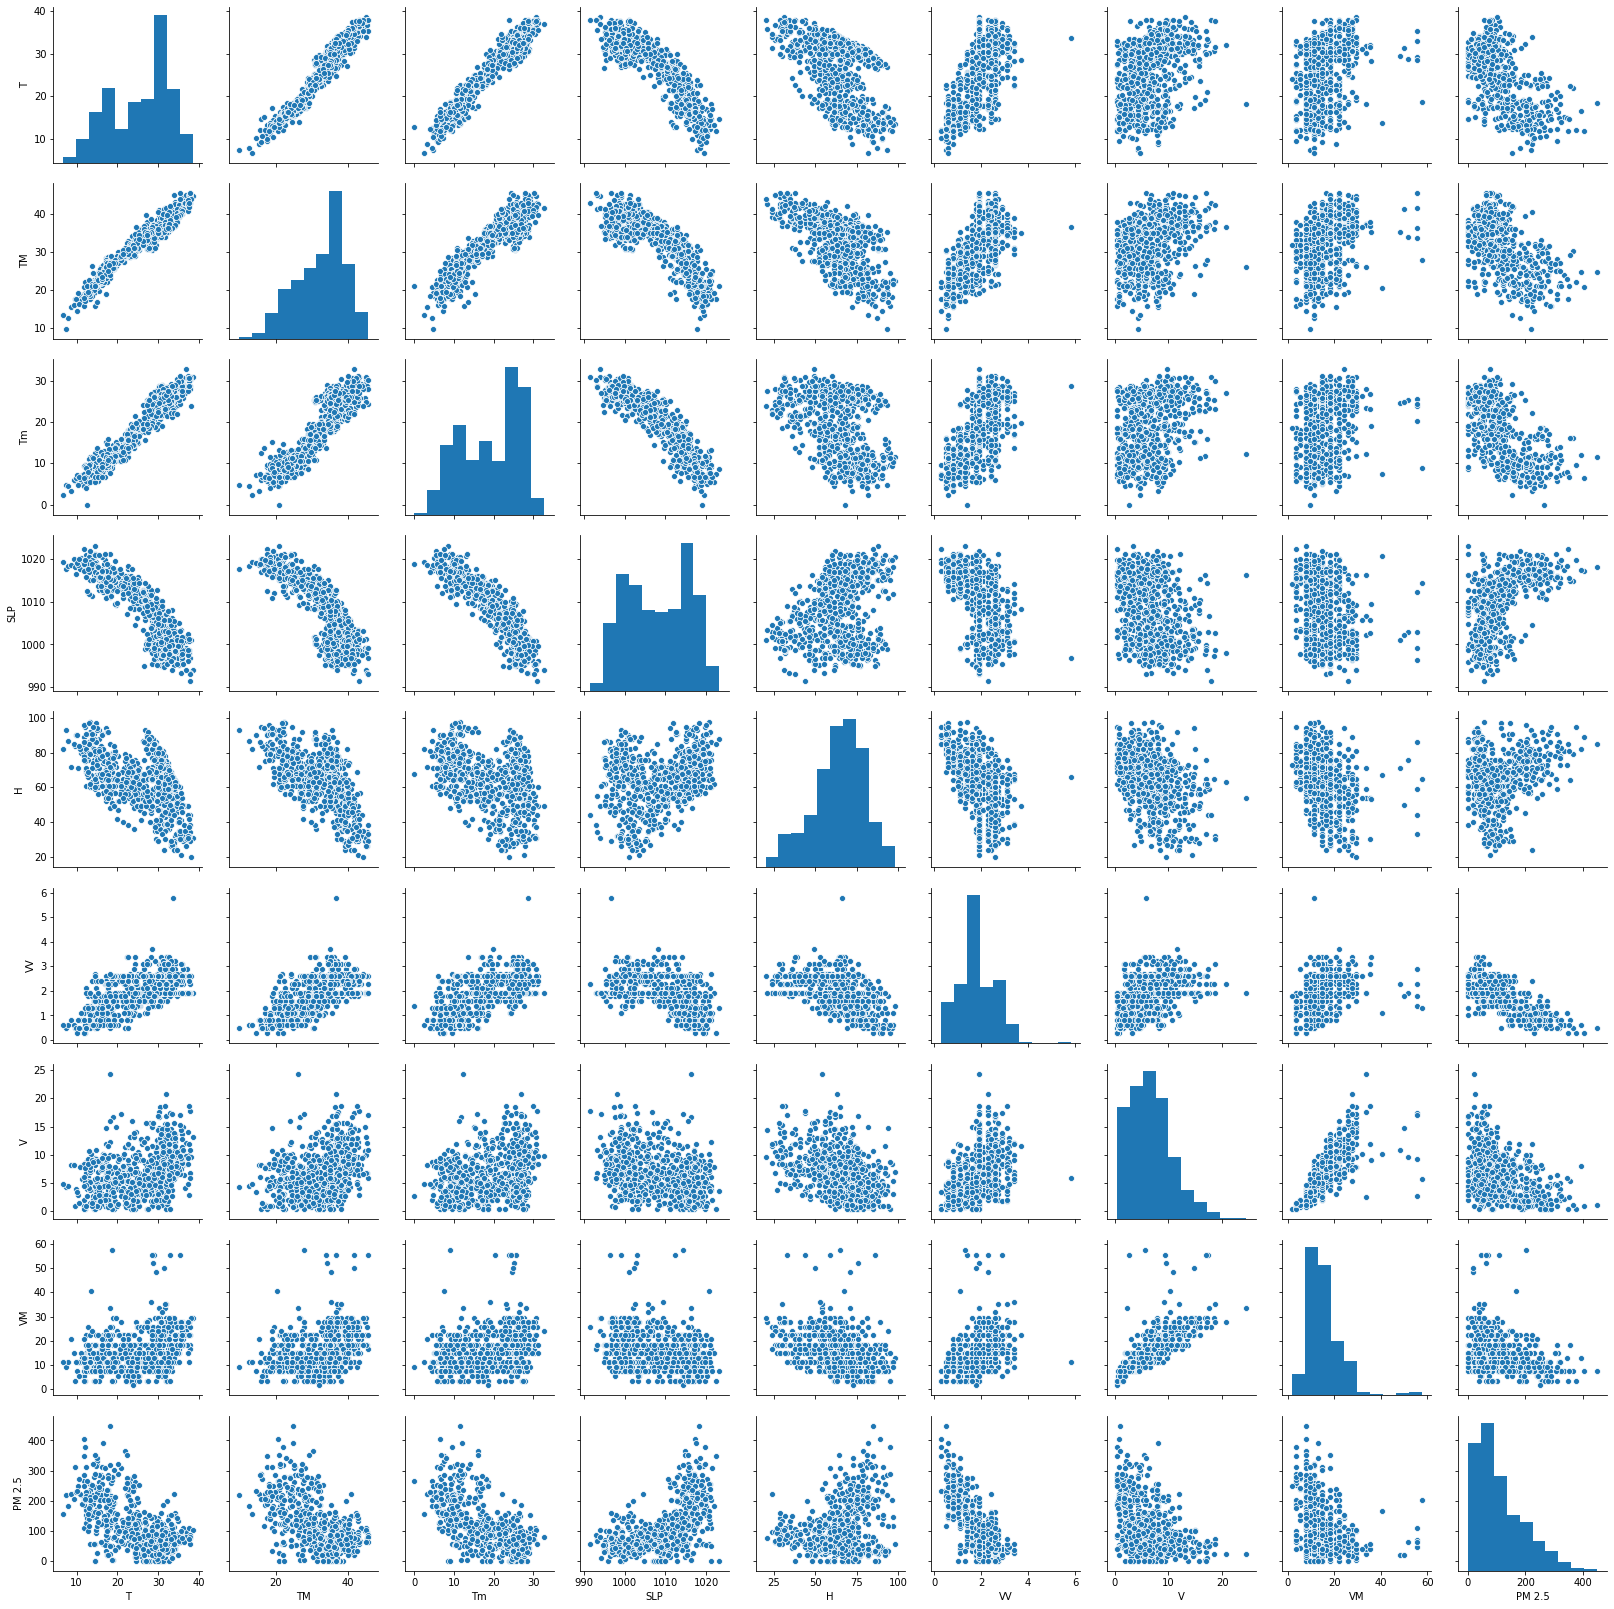

In [12]:
sns.pairplot(aqi_data)

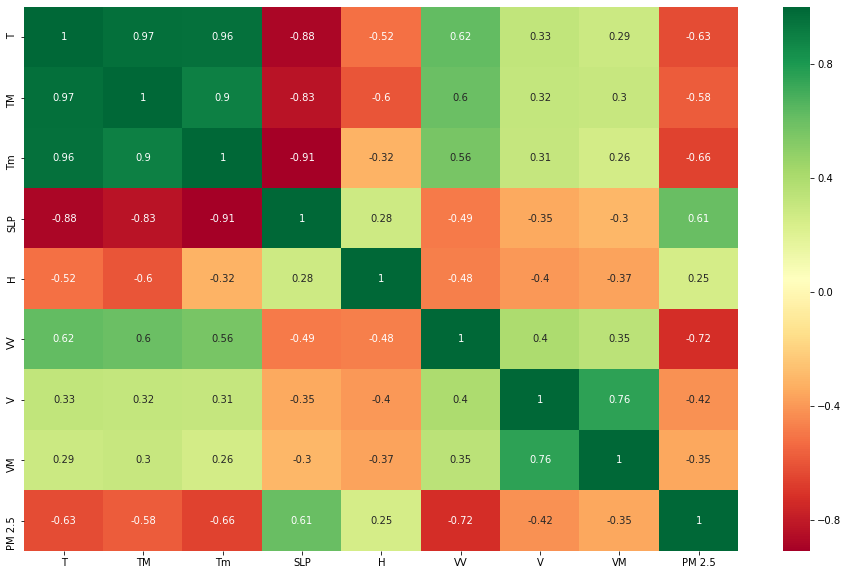

In [13]:
#get the correlation of each features in the dataset
corrmat = aqi_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,10))
#plot heat map
g=sns.heatmap(aqi_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
aqi_data.isnull().sum()

T           0
TM          0
Tm          0
SLP         0
H           0
VV          0
V           0
VM          0
PM 2.5    120
dtype: int64

In [20]:
aqi_data = aqi_data.dropna()
aqi_data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [21]:
aqi_data.shape

(611, 9)

In [0]:
#Split the independent features and dependent features
#independent feature
X = aqi_data.iloc[:,:-1]
y = aqi_data.iloc[:,-1]

In [23]:
print(X.shape, y.shape)

(611, 8) (611,)


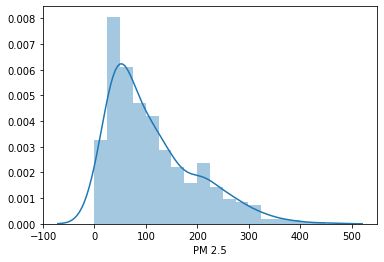

In [24]:
sns.distplot(y)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [29]:
dtc = tree(criterion="mse")
dtc.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
print("R2 TRAINED DATA/Learned dataset  score....",dtc.score(X_train,y_train))

R2 TRAINED DATA/Learned dataset  score.... 1.0


In [32]:
print("R2 TESTED DATA/Learned dataset  score....",dtc.score(X_test,y_test))

R2 TESTED DATA/Learned dataset  score.... 0.4989317518292331


In [38]:
# Based on train set score, test score is less so its overfitting
#To we need to check Cross val score
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(dtc,X_train,y_train,cv=5).mean()
cross_score

0.4408527066560919

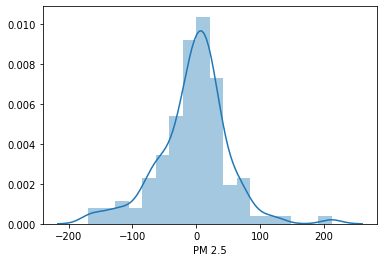

In [39]:
y_pred = dtc.predict(X_test)
sns.distplot(y_test-y_pred)

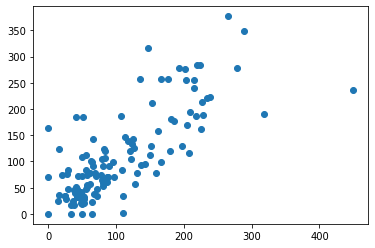

In [40]:
plt.scatter(y_test,y_pred)

In [0]:
#Hypertuning Decsion Tree Regressor
# Hyperparameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}


In [44]:
#Hyperparameter Optimization using GridSearchCV and RandomizedSearchCV
%%time
grid = GridSearchCV(dtc,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
grid.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 3080 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 8200 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 15368 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 24584 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 35848 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 49160 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 64520 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 81928 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 101384 tasks      | elapsed:  5.1min


CPU times: user 1min 7s, sys: 1.07 s, total: 1min 8s
Wall time: 5min 10s


[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  5.2min finished


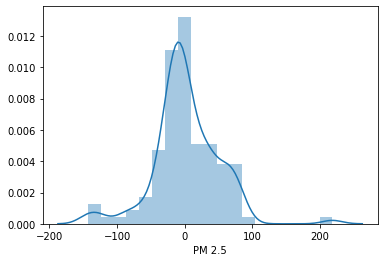

In [46]:
y_pred = grid.predict(X_test)
sns.distplot(y_test-y_pred)

In [47]:
grid.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [48]:
grid.best_score_

-2768.6446056563414

In [53]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 34.189052641360945
MSE: 2359.341208368448
RMSE: 48.573050227141884


In [54]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 34.189052641360945
MSE: 2359.341208368448
RMSE: 48.573050227141884


In [0]:
import pickle
file = open('decsion_tree_regressor_model','wb')
pickle.dump(grid,file)